In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from tabulate import tabulate
import numpy as np
%matplotlib inline

pd.set_option('display.max_columns', None)
pd.options.display.max_rows = 200

In [2]:
#define as features

df2019_cols = ["CO_ENTIDADE", "CO_UF", "CO_MUNICIPIO", "TP_DEPENDENCIA", "ID_ALUNO", "NU_IDADE","CO_UF_END", "TP_ZONA_RESIDENCIAL","TP_ETAPA_ENSINO","NU_DURACAO_TURMA", "NU_DIAS_ATIVIDADE"]

In [4]:
df2019 = pd.read_csv("MATRICULA_SUDESTE.csv", sep="|", usecols=df2019_cols)

In [5]:
df2019.head()

,ID_ALUNO,NU_IDADE,CO_UF_END,TP_ZONA_RESIDENCIAL,TP_ETAPA_ENSINO,NU_DURACAO_TURMA,NU_DIAS_ATIVIDADE,CO_ENTIDADE,CO_UF,CO_MUNICIPIO,TP_DEPENDENCIA
0,2CD712F0670B8A5F7CD524895C8D6C09,3,32.0,1.0,1.0,255.0,5.0,32061790,32,3200359,3
1,E85457D979E93F690B19EC09EA69F560,20,NaN,1.0,34.0,360.0,5.0,32080824,32,3201308,1
2,D8587C10F910D515F2E0C072EC425BC2,10,32.0,1.0,18.0,295.0,5.0,32037678,32,3205101,3
3,72CD43351E420F2C2FDBE0F357EA6B8D,13,32.0,1.0,18.0,270.0,5.0,32036345,32,3205002,3
4,AE62FE6930121AC5590FCC2EE9F3AAFF,15,32.0,1.0,41.0,270.0,5.0,32006160,32,3203908,3


In [6]:
# aceita apenas alunos da zona urbana

df2019 = df2019[df2019["TP_ZONA_RESIDENCIAL"]==1]            

In [7]:
# aceita apenas alunos do ensino fundamental

df2019 = df2019[(df2019["TP_ETAPA_ENSINO"] == 14) | (df2019["TP_ETAPA_ENSINO"] == 15) | (df2019["TP_ETAPA_ENSINO"] == 16) | (df2019["TP_ETAPA_ENSINO"] == 17) | (df2019["TP_ETAPA_ENSINO"] == 18) |  (df2019["TP_ETAPA_ENSINO"] == 19) | (df2019["TP_ETAPA_ENSINO"] == 20) | (df2019["TP_ETAPA_ENSINO"] ==21) | (df2019["TP_ETAPA_ENSINO"] == 41)]

In [9]:
df2019

,ID_ALUNO,NU_IDADE,CO_UF_END,TP_ZONA_RESIDENCIAL,TP_ETAPA_ENSINO,NU_DURACAO_TURMA,NU_DIAS_ATIVIDADE,CO_ENTIDADE,CO_UF,CO_MUNICIPIO,TP_DEPENDENCIA
2,D8587C10F910D515F2E0C072EC425BC2,10,32.0,1.0,18.0,295.0,5.0,32037678,32,3205101,3
3,72CD43351E420F2C2FDBE0F357EA6B8D,13,32.0,1.0,18.0,270.0,5.0,32036345,32,3205002,3
4,AE62FE6930121AC5590FCC2EE9F3AAFF,15,32.0,1.0,41.0,270.0,5.0,32006160,32,3203908,3
9,32300C21D7CEB1E31FC7C70C7D250E03,8,32.0,1.0,15.0,270.0,5.0,32052588,32,3201209,3
10,DFC5115E5861829BADE0C5EC7FA835F2,8,32.0,1.0,15.0,270.0,5.0,32099800,32,3205200,3
...,...,...,...,...,...,...,...,...,...,...,...
19785834,23E3BFC15EE00CD6A7C96C1A285BA59D,15,NaN,1.0,21.0,270.0,5.0,31212644,31,3118601,2
19785838,0065CC45A5CBF5CFC80FC86F0C54B2F7,6,31.0,1.0,14.0,255.0,5.0,31012394,31,3162922,3
19785841,AC2F364ECA5CDCEFE59DEA1A8C3DEF73,8,31.0,1.0,16.0,260.0,5.0,31129569,31,3163805,3
19785842,3E6CEAC8E3A2587C5D09B93D3248B609,13,31.0,1.0,21.0,270.0,5.0,31011223,31,3106705,3


In [10]:
# aceita apenas escolas privadas

df2019 = df2019[df2019["TP_DEPENDENCIA"] == 4]

In [11]:
# qntd de alunos matriculados no ensino fundamental de escolas privadas do Sudeste

df2019["ID_ALUNO"].count()

2070039

In [12]:
# retira alunos de faixa etária superior ao target

df2019 = df2019[df2019["NU_IDADE"] < 18]

In [13]:
df2019

,ID_ALUNO,NU_IDADE,CO_UF_END,TP_ZONA_RESIDENCIAL,TP_ETAPA_ENSINO,NU_DURACAO_TURMA,NU_DIAS_ATIVIDADE,CO_ENTIDADE,CO_UF,CO_MUNICIPIO,TP_DEPENDENCIA
12,954E200DB0BABEA7B6D0731B303238AE,10,32.0,1.0,17.0,270.0,5.0,32019688,32,3200607,4
15,BA8B0ABE808A3256E060E257D7DF2397,15,32.0,1.0,41.0,270.0,5.0,32034288,32,3201308,4
17,3E3BB3A80BD977DFBE7696EB222F93E7,12,32.0,1.0,20.0,270.0,5.0,32064420,32,3200201,4
21,5DAB617A4A170370349A1DB3760B7EEF,8,32.0,1.0,15.0,270.0,5.0,32043759,32,3202405,4
22,A91D9B6D829DC92004AA4E2DCF93EB61,10,32.0,1.0,17.0,275.0,5.0,32068700,32,3205309,4
...,...,...,...,...,...,...,...,...,...,...,...
19785741,E73C5043C1146541FAE70DB0A5C72A75,13,31.0,1.0,20.0,270.0,6.0,31346314,31,3138203,4
19785763,8A7BE022D4D8685E72EABA3246F44D5F,9,31.0,1.0,17.0,270.0,5.0,31313513,31,3154606,4
19785803,4AA175D9D916DF477200C53C2DD645F2,15,31.0,1.0,21.0,270.0,5.0,31004499,31,3106200,4
19785814,85A5AB7889C885A51FF51522DA4DA4DE,10,31.0,1.0,18.0,270.0,5.0,31333670,31,3106200,4


In [14]:
def ajusta_serie(v):
    if v == 14:
        return 1
    if v == 15:
        return 2
    if v == 16:
        return 3
    if v == 17:
        return 4
    if v == 18:
        return 5
    if v == 19:
        return 6
    if v == 20:
        return 7
    if v == 21:
        return 8
    if v == 41:
        return 9

In [15]:
df2019["SERIE"] = df2019["TP_ETAPA_ENSINO"].apply(ajusta_serie)

In [16]:
df2019.head()

,ID_ALUNO,NU_IDADE,CO_UF_END,TP_ZONA_RESIDENCIAL,TP_ETAPA_ENSINO,NU_DURACAO_TURMA,NU_DIAS_ATIVIDADE,CO_ENTIDADE,CO_UF,CO_MUNICIPIO,TP_DEPENDENCIA,SERIE
12,954E200DB0BABEA7B6D0731B303238AE,10,32.0,1.0,17.0,270.0,5.0,32019688,32,3200607,4,4
15,BA8B0ABE808A3256E060E257D7DF2397,15,32.0,1.0,41.0,270.0,5.0,32034288,32,3201308,4,9
17,3E3BB3A80BD977DFBE7696EB222F93E7,12,32.0,1.0,20.0,270.0,5.0,32064420,32,3200201,4,7
21,5DAB617A4A170370349A1DB3760B7EEF,8,32.0,1.0,15.0,270.0,5.0,32043759,32,3202405,4,2
22,A91D9B6D829DC92004AA4E2DCF93EB61,10,32.0,1.0,17.0,275.0,5.0,32068700,32,3205309,4,4


In [17]:
# concentração por série

df2019["SERIE"].value_counts()

1    255321
2    247132
3    244218
4    236064
5    231332
6    227510
7    216332
8    197162
9    196126
Name: SERIE, dtype: int64

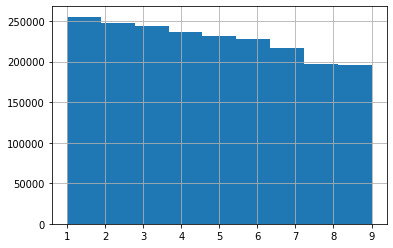

In [18]:
df2019["SERIE"].hist(bins=9)

In [19]:
# qntd de dias por semana que são realizadas atividades regulares / qntd de alunos

df2019["NU_DIAS_ATIVIDADE"].value_counts()

5.0    2033276
6.0      15751
4.0       1702
1.0        272
3.0        166
2.0         18
7.0         12
Name: NU_DIAS_ATIVIDADE, dtype: int64

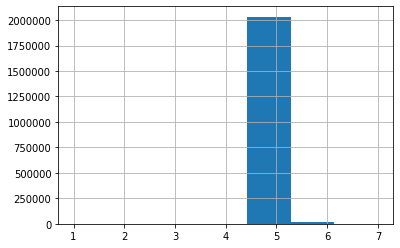

In [20]:
df2019["NU_DIAS_ATIVIDADE"].hist(bins=7)

In [21]:
# concentração de tempo de permanencia do aluno na escola em minutos

df2019["NU_DURACAO_TURMA"].value_counts(normalize=True).head()

270.0    0.317738
320.0    0.122321
240.0    0.103682
300.0    0.078131
280.0    0.053426
Name: NU_DURACAO_TURMA, dtype: float64

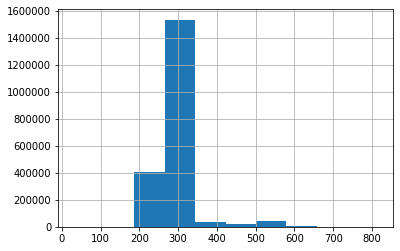

In [22]:
df2019["NU_DURACAO_TURMA"].hist()

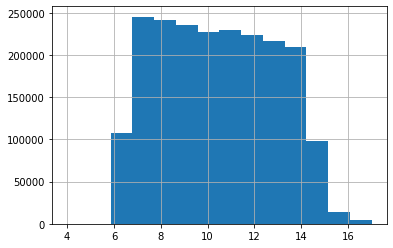

In [23]:
df2019["NU_IDADE"].hist(bins=14)

In [24]:
df2019["NU_IDADE"].value_counts()

7     245206
8     241333
9     235238
11    229001
10    227502
12    223025
13    216058
14    209866
6     107751
15     98053
16     13764
17      4065
5        267
4         68
Name: NU_IDADE, dtype: int64

In [ ]:
df2019.to_csv("censo2019", index=False)

In [26]:
#read dataset
file_path = "rendimento_escolar.csv"
#data = pd.read_excel(file_path,skiprows= 7, sheet_name='NORTE')
data = pd.read_csv(file_path)

In [27]:
# iterating the columns 
for col in data.columns: 
    print(col)

Ano
Região
UF
Código do Município
Nome do Município
Localização
Rede
Código da Escola
Nome da Escola
Aprovação no 1º Ano do Ensino Fundamental
Aprovação na 1ª série/2º Ano
Aprovação na 2ª série/3º Ano
Aprovação na 3ª série/4º Ano
Aprovaçãona 4ª série/5º Ano
Aprovação na 5ª série/6º Ano
Aprovação na 6ª série/7º Ano
Aprovação na 7ª série/8º Ano
Aprovação na 8ª série/9º Ano
Aprovação 1ª a 4ª  Série/1º a 5º Ano
Aprovação 5ª a 8ª Série/ 6º ao 9º Ano
Total_Aprovação_Fundamental
Aprovação na 1ª série - Médio
Aprovação na 2ª série - Médio
Aprovação na 3ª série - Médio
Aprovação na 4ª série - Médio
Total  Aprovação Médio Não Seriado
Total  Aprovação Médio
Reprovação no 1º Ano do Ensino Fundamental
Reprovação na 1ª série/2º Ano
Reprovação na 2ª série/3º Ano
Reprovação na 3ª série/4º Ano
Reprovação na 4ª série/5º Ano
Reprovação na 5ª série/6º Ano
Reprovação na 6ª série/7º Ano
Reprovação na 7ª série/8º Ano
Reprovação na 8ª série/9º Ano
Reprovação 1ª a 4ª  Série/1º a 5º Ano
Reprovação 5ª a 8ª Série

In [28]:
df = pd.DataFrame(data)

## Quantidade de escolas por Unidade Federativa

SP    15692
MG    12608
RJ     7995
ES     2612
Name: UF, dtype: int64


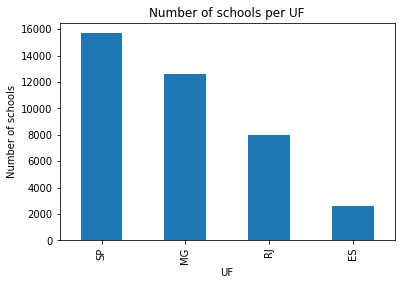

In [29]:
#plot graph
df['UF'].value_counts().plot(kind='bar');
plt.xlabel("UF")
plt.ylabel("Number of schools")
plt.title("Number of schools per UF");

print(df['UF'].value_counts())

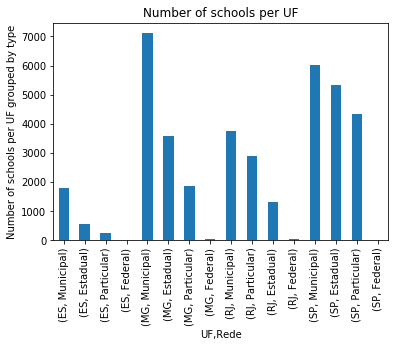

In [30]:
group_data = df.groupby('UF')['Rede'].value_counts()
#plt.xlabel("UF")
plt.ylabel("Number of schools per UF grouped by type")
plt.title("Number of schools per UF");
group_data.plot(x='UF', y='Rede', kind="bar")

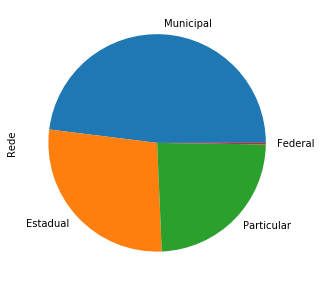

In [31]:
plot = df['Rede'].value_counts().plot.pie(y='mass', figsize=(5, 5))

<class 'pandas.core.series.Series'>


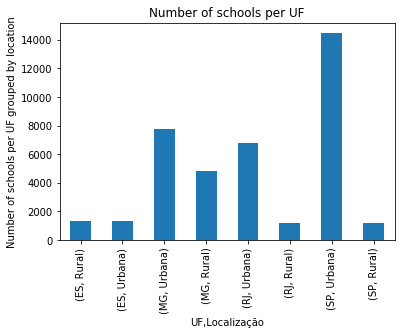

In [32]:
group_data = df.groupby('UF')['Localização'].value_counts()
print(type(group_data))
#plt.xlabel("UF")
plt.ylabel("Number of schools per UF grouped by location")
plt.title("Number of schools per UF");
group_data.plot(x='UF', y='Rede', kind="bar")

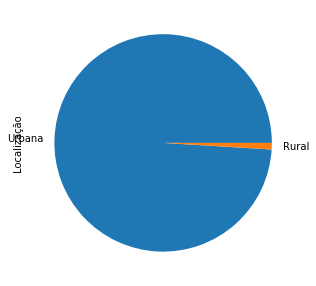

In [33]:
newdf = df.query('Rede == "Particular"')
plot = newdf['Localização'].value_counts().plot.pie(y='mass', figsize=(5, 5))

<class 'pandas.core.series.Series'>


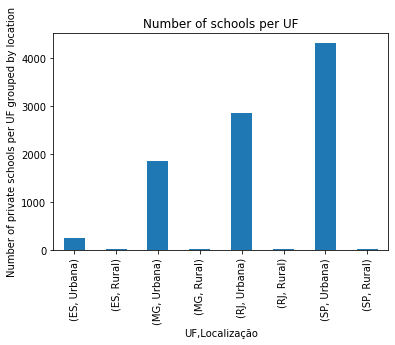

In [34]:
newdf = df.query('Rede == "Particular"')
group_data = newdf.groupby('UF')['Localização'].value_counts()
print(type(group_data))
plt.ylabel("Number of private schools per UF grouped by location")
plt.title("Number of schools per UF");
group_data.plot(x='UF', y='Rede', kind="bar")

In [35]:
aproval1 = df.query('Total_Aprovação_Fundamental == "--"')
aproval1 = aproval1['UF'].value_counts()
aproval2 = df.query('Total_Aprovação_Fundamental != "--"')
aproval2 = aproval2['UF'].value_counts()

print("No info approval:", aproval1)
print("Approval with info:",aproval2)

No info approval: RJ    1380
SP     823
MG     323
ES     113
Name: UF, dtype: int64
Approval with info: SP    14869
MG    12285
RJ     6615
ES     2499
Name: UF, dtype: int64


In [36]:
rows = list()
for index in df.index:
    #print(index)
    if df.loc[index,'Total_Aprovação_Fundamental']!='--':
        df.loc[index,'Total_Aprovação_Fundamental'] = df.loc[index,'Total_Aprovação_Fundamental'].replace(",",".")
        df.loc[index,'Total_Aprovação_Fundamental'] = float(df.loc[index,'Total_Aprovação_Fundamental'])
    else:
        rows.append(index)
    if df.loc[index,'Total_Abandono_Fundamental']!='--':
        df.loc[index,'Total_Abandono_Fundamental'] = df.loc[index,'Total_Abandono_Fundamental'].replace(",",".")
        df.loc[index,'Total_Abandono_Fundamental'] = float(df.loc[index,'Total_Abandono_Fundamental'])
    else:
        rows.append(index)

In [37]:
print(len(rows))
print(df['UF'].value_counts())

5278
SP    15692
MG    12608
RJ     7995
ES     2612
Name: UF, dtype: int64


In [39]:
df.drop(df.index[rows], inplace=True)

count     36268.0
unique      567.0
top         100.0
freq       5974.0
Name: Total_Aprovação_Fundamental, dtype: float64


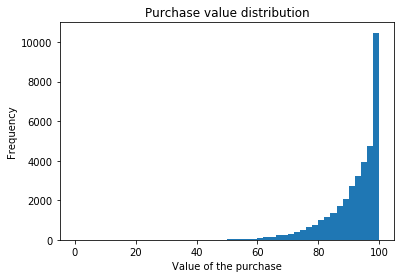

In [40]:
print(df["Total_Aprovação_Fundamental"].describe())
df["Total_Aprovação_Fundamental"].plot.hist(bins=50)
plt.ylabel("Frequency")
plt.xlabel("Value of the purchase")
plt.title("Purchase value distribution");

count     36268.0
unique      294.0
top           0.0
freq      20399.0
Name: Total_Abandono_Fundamental, dtype: float64


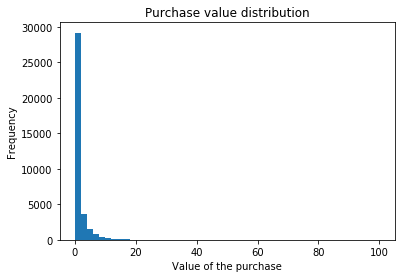

In [41]:
print(df["Total_Abandono_Fundamental"].describe())
df["Total_Abandono_Fundamental"].plot.hist(bins=50)
plt.ylabel("Frequency")
plt.xlabel("Value of the purchase")
plt.title("Purchase value distribution");

## Aprovação São Paulo

count     14869.0
unique      311.0
top         100.0
freq       2155.0
Name: Total_Aprovação_Fundamental, dtype: float64


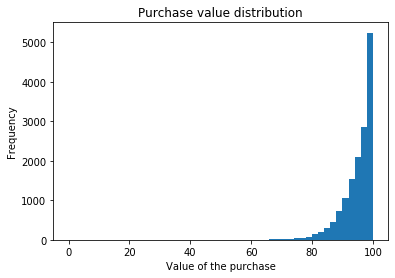

In [43]:
approval_sp = df.query('UF == "SP"')
print(approval_sp["Total_Aprovação_Fundamental"].describe())
approval_sp["Total_Aprovação_Fundamental"].plot.hist(bins=50)
plt.ylabel("Frequency")
plt.xlabel("Value of the purchase")
plt.title("Purchase value distribution");

count     14869.0
unique      134.0
top           0.0
freq       9634.0
Name: Total_Abandono_Fundamental, dtype: float64


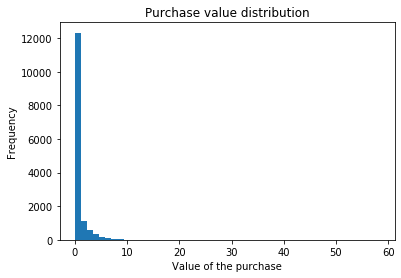

In [44]:
print(approval_sp["Total_Abandono_Fundamental"].describe())
approval_sp["Total_Abandono_Fundamental"].plot.hist(bins=50)
plt.ylabel("Frequency")
plt.xlabel("Value of the purchase")
plt.title("Purchase value distribution");

count     3991.0
unique     154.0
top        100.0
freq      1101.0
Name: Total_Aprovação_Fundamental, dtype: float64


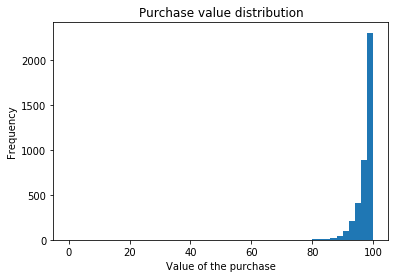

In [45]:
approval_sp = df.query('UF == "SP" & Rede == "Particular" & Localização == "Urbana"')
print(approval_sp["Total_Aprovação_Fundamental"].describe())
approval_sp["Total_Aprovação_Fundamental"].plot.hist(bins=50)
plt.ylabel("Frequency")
plt.xlabel("Value of the purchase")
plt.title("Purchase value distribution");

count     9701.0
unique     292.0
top        100.0
freq       745.0
Name: Total_Aprovação_Fundamental, dtype: float64


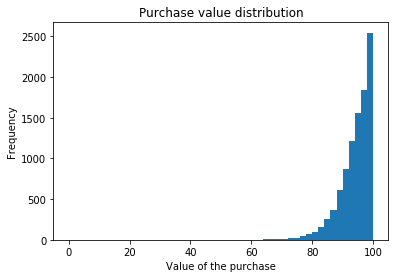

In [46]:
approval_sp = df.query('UF == "SP" & Rede != "Particular" & Localização == "Urbana"')
print(approval_sp["Total_Aprovação_Fundamental"].describe())
approval_sp["Total_Aprovação_Fundamental"].plot.hist(bins=50)
plt.ylabel("Frequency")
plt.xlabel("Value of the purchase")
plt.title("Purchase value distribution");

count     20.0
unique    15.0
top       97.3
freq       3.0
Name: Total_Aprovação_Fundamental, dtype: float64


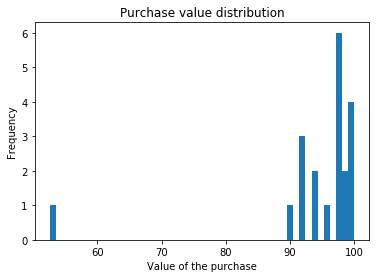

In [47]:
approval_sp = df.query('UF == "SP" & Rede == "Particular" & Localização == "Rural"')
print(approval_sp["Total_Aprovação_Fundamental"].describe())
approval_sp["Total_Aprovação_Fundamental"].plot.hist(bins=50)
plt.ylabel("Frequency")
plt.xlabel("Value of the purchase")
plt.title("Purchase value distribution");

## Aprovação ES

count     2499.0
unique     323.0
top        100.0
freq       652.0
Name: Total_Aprovação_Fundamental, dtype: float64


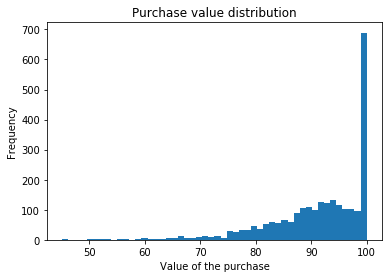

In [49]:
approval_sp = df.query('UF == "ES"')
print(approval_sp["Total_Aprovação_Fundamental"].describe())
approval_sp["Total_Aprovação_Fundamental"].plot.hist(bins=50)
plt.ylabel("Frequency")
plt.xlabel("Value of the purchase")
plt.title("Purchase value distribution");

count     12.0
unique    12.0
top       95.0
freq       1.0
Name: Total_Aprovação_Fundamental, dtype: float64


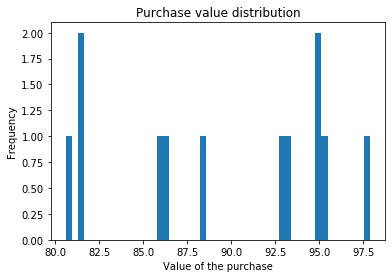

In [50]:
approval_sp = df.query('UF == "ES" & Rede == "Particular" & Localização == "Rural"')
print(approval_sp["Total_Aprovação_Fundamental"].describe())
approval_sp["Total_Aprovação_Fundamental"].plot.hist(bins=50)
plt.ylabel("Frequency")
plt.xlabel("Value of the purchase")
plt.title("Purchase value distribution");

## Aprovação MG

count     12285.0
unique      442.0
top         100.0
freq       2778.0
Name: Total_Aprovação_Fundamental, dtype: float64


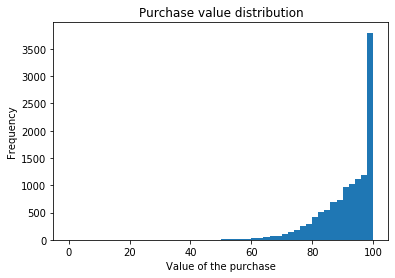

In [51]:
approval_sp = df.query('UF == "MG"')
print(approval_sp["Total_Aprovação_Fundamental"].describe())
approval_sp["Total_Aprovação_Fundamental"].plot.hist(bins=50)
plt.ylabel("Frequency")
plt.xlabel("Value of the purchase")
plt.title("Purchase value distribution");

count     1755.0
unique     156.0
top        100.0
freq       660.0
Name: Total_Aprovação_Fundamental, dtype: float64


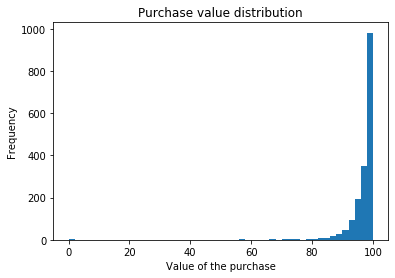

In [52]:
approval_sp = df.query('UF == "MG" & Rede == "Particular" & Localização == "Urbana"')
print(approval_sp["Total_Aprovação_Fundamental"].describe())
approval_sp["Total_Aprovação_Fundamental"].plot.hist(bins=50)
plt.ylabel("Frequency")
plt.xlabel("Value of the purchase")
plt.title("Purchase value distribution");

count      14.0
unique     10.0
top       100.0
freq        5.0
Name: Total_Aprovação_Fundamental, dtype: float64


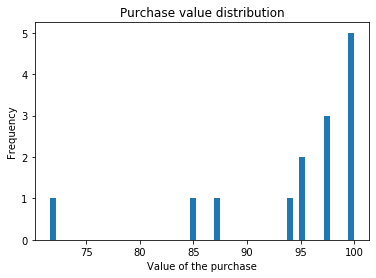

In [53]:
approval_sp = df.query('UF == "MG" & Rede == "Particular" & Localização == "Rural"')
print(approval_sp["Total_Aprovação_Fundamental"].describe())
approval_sp["Total_Aprovação_Fundamental"].plot.hist(bins=50)
plt.ylabel("Frequency")
plt.xlabel("Value of the purchase")
plt.title("Purchase value distribution");

## Aprovacao RJ

count     6615.0
unique     533.0
top        100.0
freq       389.0
Name: Total_Aprovação_Fundamental, dtype: float64


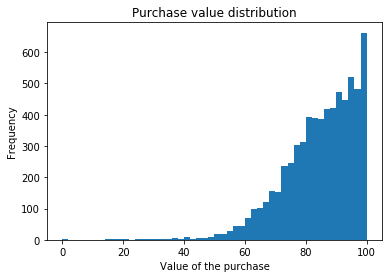

In [54]:
approval_sp = df.query('UF == "RJ"')
print(approval_sp["Total_Aprovação_Fundamental"].describe())
approval_sp["Total_Aprovação_Fundamental"].plot.hist(bins=50)
plt.ylabel("Frequency")
plt.xlabel("Value of the purchase")
plt.title("Purchase value distribution");

count     1788.0
unique     220.0
top        100.0
freq       260.0
Name: Total_Aprovação_Fundamental, dtype: float64


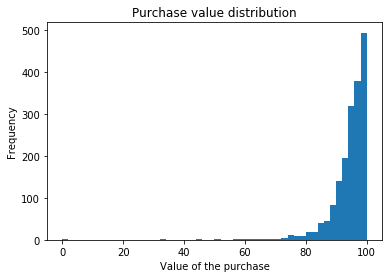

In [55]:
approval_sp = df.query('UF == "RJ" & Rede == "Particular" & Localização == "Urbana"')
print(approval_sp["Total_Aprovação_Fundamental"].describe())
approval_sp["Total_Aprovação_Fundamental"].plot.hist(bins=50)
plt.ylabel("Frequency")
plt.xlabel("Value of the purchase")
plt.title("Purchase value distribution");

count      25.0
unique     21.0
top       100.0
freq        4.0
Name: Total_Aprovação_Fundamental, dtype: float64


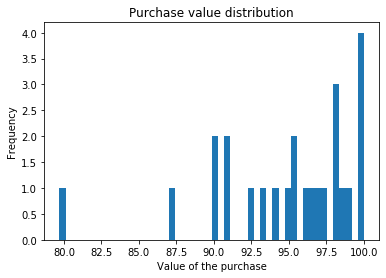

In [56]:
approval_sp = df.query('UF == "RJ" & Rede == "Particular" & Localização == "Rural"')
print(approval_sp["Total_Aprovação_Fundamental"].describe())
approval_sp["Total_Aprovação_Fundamental"].plot.hist(bins=50)
plt.ylabel("Frequency")
plt.xlabel("Value of the purchase")
plt.title("Purchase value distribution");